In [11]:
import joblib
import pandas as pd
import numpy as np
import re
from bnlp.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [12]:
lgbm_model_new=joblib.load(r"D:\Download\lgbm_file_new.pkl")
print(dir(lgbm_model_new))

['_Booster', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_best_iteration', '_best_score', '_check_n_features', '_class_map', '_class_weight', '_classes', '_estimator_type', '_evals_result', '_fobj', '_get_param_names', '_get_tags', '_le', '_more_tags', '_n_classes', '_n_features', '_objective', '_other_params', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'best_iteration_', 'best_score_', 'booster_', 'boosting_type', 'class_weight', 'classes_', 'colsample_bytree', 'evals_result_', 'feature_importances_', 'fit', 'get_params', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain',

In [13]:
label_auth=pd.read_csv(r'D:\Download\LabeledAuthentic-7K.csv', nrows=1500)
label_fake=pd.read_csv(r'D:\Download\LabeledFake-1K.csv')
label_auth.drop(['source','relation'], axis=1, inplace=True)
label_fake.drop(['source','relation','F-type'], axis=1, inplace=True)
df=pd.concat([label_auth, label_fake], axis=0)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df['label']=np.where(df['label']==0.0, 0, 1)
df.tail()
df=df.sample(frac=1).reset_index(drop=True)
print(df.shape)
df.head()

(2799, 7)


,articleID,domain,date,category,headline,content,label
0,304,bengalbeats.com,2019-03-12T13:35:22+00:00,Miscellaneous,ডাকসু নির্বাচনের ফলাফলকে অষ্টমাশ্চর্য হিসেবে ঘ...,গতকাল মধ্যরাতে ঘড়ির কাটা যখন ৩ এর একটু এদিক সে...,0
1,961,earki.com,"সেম্বর ২৫, ২০১৮",Miscellaneous,সান্তা ক্লজ যদি বড়দিনে শিশুদের জন্য উপহার নিয়ে...,২৫ ডিসেম্বর সারা বিশ্বে পালিত হয় খ্রিস্টানদের ...,0
2,377,dailyjanakantha.com,2018-09-22 16:37:01,National,খালেদাকে ক্ষমতার বাইরে রাখতে হবে ॥ তথ্যমন্ত্রী...,"নিজস্ব সংবাদদাতা, গাইবান্ধা ॥ তথ্যমন্ত্রী ও জা...",1
3,700,somoynews.tv,2018-09-19 18:37:34,Entertainment,‘শাহরুখ জাহান্নামে যেতে প্রস্তুত হও’,বলিউডের কিং খান শাহরুখ। তিনি মুসলিম ধর্মের হলে...,1
4,1534,banglanews24.com,2018-09-21 19:53:23,Miscellaneous,ঘোড়া মারার প্রতিশোধে কুমির হত্যা করলেন মেয়র!,তিন বছর ধরে নাকি বিশালাকৃতির একটি কুমিরকে খুঁজ...,1


In [14]:
def preprocess(data):
    """This function is for preprocessing of the news contents. It removes punctuations, English characters and both of Bangla
    and English numerals. It tokenizes all the words and also removes stopwords.
    
    Args: 
        The Entire Dataframe
    Returns:
        Preprocessed news corpuses in a list of lists
    """
    corpus=[]
    for i in range(0, len(data)):
        x=re.sub('[^\u0980-\u09FF]',' ',data['content'][i])
        x=re.sub('[a-zA-Z0-9]+', ' ', x)
        x=re.sub('[০১২৩৪৫৬৭৮৯]+', ' ', x)
        x=x.split()
        x=[w for w in x if w not in set(stopwords)]
        x=' '.join(x)
        corpus.append(x)
    
    return corpus

In [15]:
corpus=preprocess(df)
corpus[16:20]

['সালের জানুয়ারি শেখ হাসিনা মাদার অব হিউম্যানিটি সমাজকল্যাণ পদক বছর জানুয়ারি জাতীয় সমাজসেবা দিবসে সমাজ উন্নয়নে অবদান রাখার স্বীকৃতি হিসেবে পাঁচটি ব্যক্তি প্রতিষ্ঠানকে পদক প্রশাসনিক উন্নয়ন সংক্রান্ত সচিব কমিটির সভায় সংক্রান্ত নীতিমালা অনুমোদন হয়েছে মন্ত্রিপরিষদ বিভাগের সমন্বয় সংস্কার সচিব এনএম জিয়াউল আলম তথ্য নিশ্চিত বাংলা ট্রিবিউনকে প্রশাসনিক উন্নয়ন সংক্রান্ত সচিব কমিটির বৈঠকে প্রস্তাবিত নীতিমালার অনুমোদন হয়েছে সমাজকল্যাণ মন্ত্রণালয়ের অতিরিক্ত সচিব বাজেট কার্যক্রম মূল্যায়ন ড মো নাসির উদ্দিন বাংলা ট্রিবিউনকে সচিব কমিটির সভায় প্রস্তাবিত নীতিমালার অনুমোদন মিলেছে যতদ্রুত সম্ভব নীতিমালাটি প্রজ্ঞাপন আকারে জারি প্রধানমন্ত্রী শেখ হাসিনাকে বিশ্ব মাদার অব হিউম্যানিটি ঘোষণা সারাবিশ্বে সম্মান পেয়েছেন আমরাও সম্মানে পদক করছি বছর জানুয়ারিতে পদক সমাজকল্যাণ মন্ত্রণালয় মন্ত্রিপরিষদ বিভাগ সূত্রে নীতিমালাটি মন্ত্রিপরিষদ বিভাগে পাঠানো গত সেপ্টেম্বর প্রশাসনিক উন্নয়ন সংক্রান্ত সচিব কমিটির সভায় উত্থাপন সভায় নীতিমালাটি অনুমোদন পায় প্রস্তাবিত নীতিমালায় হয়েছে সুবিধাবঞ্চিত অনগ্রসর জনগোষ্ঠীর সামাজিক সুরক্ষা প্রতিব

In [16]:
hashing=HashingVectorizer(n_features=5000, ngram_range=(1, 3))
X=hashing.fit_transform(corpus).toarray()
y=df['label'].values
X.shape, y.shape

((2799, 5000), (2799,))

In [17]:
lgbm_pred_new=lgbm_model_new.predict(X)
lgbm_pred_new

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [18]:
accuracy_score(y, lgbm_pred_new)

0.9867809932118614

In [19]:
print(classification_report(y, lgbm_pred_new))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1299
           1       1.00      0.98      0.99      1500

    accuracy                           0.99      2799
   macro avg       0.99      0.99      0.99      2799
weighted avg       0.99      0.99      0.99      2799



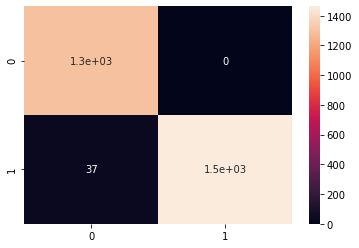

In [20]:
sns.heatmap(confusion_matrix(y, lgbm_pred_new), annot=True)
plt.show()